## What is Python Threading?

#### Threading is a sequence of instructions in a program that can be executed independently of the remaining process.
#### You can see them as different units of your process that do jobs independently when scheduled.
#### If they need to wait for a slow external operation to finish (such as a network request, or disk access), they sleep for a while and enable the scheduler to spend time executing another thread. 

## What is the Process?

#### A process is an executable instance of a computer program. Usually, a process is executed in a single sequence of control flow. 

### Built-in libraries

#### Thread: The core low-level threading library

#### Threading: A basic interface to thread, still rather low-level by modern standards

#### Multiprocessing: Similar to threading, but with processes. Shared memory tools added in Python 3.8

#### Concurrent.futures: Higher-level interface to both threading and multiprocessing. Introduced in Python 3.3 and backported in PyPI

#### Ascynio: Explicit control over switching points.

In [1]:
# get the number of logical cpu cores
import os
os.cpu_count()

8

In [2]:
import threading
import os
 
def task1():
    print("Task 1 assigned to thread: {}".format(threading.current_thread().name))
    print("ID of process running task 1: {}".format(os.getpid()))
 
def task2():
    print("Task 2 assigned to thread: {}".format(threading.current_thread().name))
    print("ID of process running task 2: {}".format(os.getpid()))
 
if __name__ == "__main__":
 
    # print ID of current process
    print("ID of process running main program: {}".format(os.getpid()))
 
    # print name of main thread
    print("Main thread name: {}".format(threading.current_thread().name))
 
    # creating threads
    t1 = threading.Thread(target=task1, name='th1')
    t2 = threading.Thread(target=task2, name='th2') 
 
    # starting threads
    t1.start()
    t2.start()
 
    # wait until all threads finish
    t1.join()
    print("t1 thread joined")
    t2.join()
    print("All threads joined")

ID of process running main program: 24144
Main thread name: MainThread
Task 1 assigned to thread: th1
ID of process running task 1: 24144
Task 2 assigned to thread: th2
ID of process running task 2: 24144
t1 thread joined
All threads joined


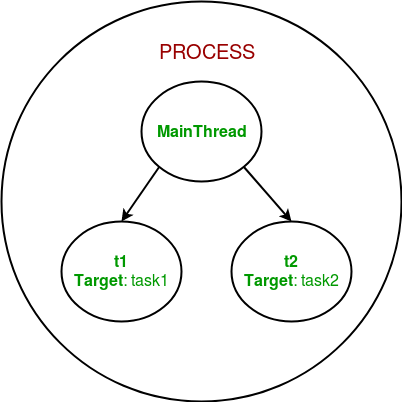

In [3]:

import threading
import time

class myThread (threading.Thread):
   def __init__(self, threadID, name, delay):
      threading.Thread.__init__(self)
      self.threadID = threadID
      self.name = name
      self.delay = delay
   def run(self):
      print( "Starting " + self.name)
      print_time(self.name, 5, self.delay)
      print( "Exiting " + self.name)

def print_time(threadName, counter, delay):
   while counter:
      time.sleep(delay)
      print ("%s: %s" % (threadName, time.ctime(time.time())))
      counter -= 1

# Create new threads
thread1 = myThread(1, "Thread-1", 1)
thread2 = myThread(2, "Thread-2", 2)

# Start new Threads
thread1.start()
#time.sleep(2)
thread2.start()
thread1.join()
thread2.join()
print( "Exiting Main Thread")

Starting Thread-1Starting Thread-2

Thread-1: Thu Nov  2 08:42:40 2023
Thread-2: Thu Nov  2 08:42:41 2023
Thread-1: Thu Nov  2 08:42:41 2023
Thread-1: Thu Nov  2 08:42:42 2023
Thread-2: Thu Nov  2 08:42:43 2023
Thread-1: Thu Nov  2 08:42:43 2023
Thread-1: Thu Nov  2 08:42:44 2023
Exiting Thread-1
Thread-2: Thu Nov  2 08:42:45 2023
Thread-2: Thu Nov  2 08:42:47 2023
Thread-2: Thu Nov  2 08:42:49 2023
Exiting Thread-2
Exiting Main Thread


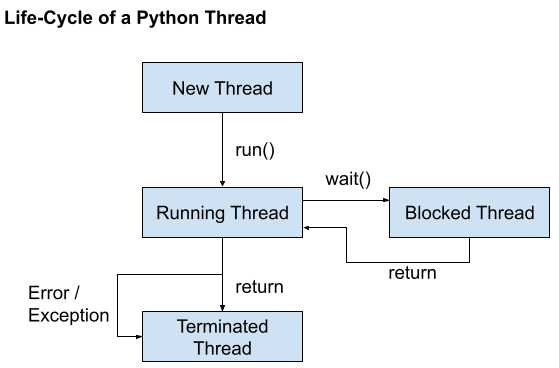